# Вариант 3

Построить модель линейной регрессии на имеющихся данных

In [231]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import torch

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [232]:
import matplotlib.pyplot as plt

df_x = pd.read_csv('drive/MyDrive/ML_2022/КР/x.csv')
df_y = pd.read_csv('drive/MyDrive/ML_2022/КР/y.csv')

df_x.head()

,Unnamed: 0,0
0,0,1.462108
1,1,1.133769
2,2,-2.301539
3,3,1.744812
4,4,0.042214


In [233]:
df_x = df_x.rename({'Unnamed: 0': "first"}, axis=1)
df_y = df_y.rename({'Unnamed: 0': "first"}, axis=1)

res = pd.merge(df_x, df_y, on = 'first' ) # , on=0)

In [234]:
df_res = res.iloc[:, [1,2]]
df_res.head()

,0_x,0_y
0,1.462108,101.159902
1,1.133769,78.442913
2,-2.301539,-159.238195
3,1.744812,120.719533
4,0.042214,2.920673


Зашумим входные данные

In [235]:
noise = np.random.randint(-100, 340, size=20) / 10
df_res['0_y'] = df_res['0_y'] + noise

<ipython-input-235-aa757312d54a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res['0_y'] = df_res['0_y'] + noise


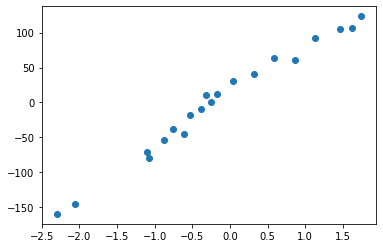

In [236]:
plt.figure()
plt.scatter(df_res['0_x'], df_res['0_y'])
plt.show()

In [237]:
X = torch.tensor(df_res['0_x']).view(-1, 1)
y = torch.tensor(df_res['0_y']).view(-1, 1)

In [242]:
from sklearn.metrics import r2_score

In [272]:
class Linear:
  def __init__(self, n_features, n_neurons):
    self.n_features = n_features
    self.n_neurons = n_neurons
    self.weights = torch.randn(n_neurons, n_features).T
    self.biases = torch.randn(n_neurons)    
  
  def forward(self, inputs):
    self.inputs = inputs
    return inputs.float() @ self.weights.float() + self.biases.float()

  def backward(self, dvalues):
    self.dweights = self.inputs.T.float() @ dvalues.float()
    self.dbiases = dvalues.mean()
    self.dinputs = dvalues.float() @ self.weights.T.float()

In [273]:
class ReLU:
  def forward(self, inputs):
    self.inputs = inputs
    self.output = inputs.clip(min=0)
    return self.output
  
  def backward(self, dvalues):
    self.dinputs = dvalues.clone()
    self.dinputs[self.inputs <= 0] = 0

In [274]:
class MSELoss:
  def forward(self, y_pred, y_true):
    return torch.mean((y_pred - y_true) ** 2)

  def backward(self, y_pred, y_true):
    self.dinput = 2 * (y_pred - y_true) / y_pred.shape[0]

In [275]:
fc1 = Linear(X.shape[1], 10)
relu1 = ReLU()
fc2 = Linear(10, 1)
loss = MSELoss()
lr = 0.002

ys = []
r2=[]
mse=[]

In [276]:
for epoch in range(1000):
    y_pred = fc2.forward(relu1.forward(fc1.forward(X)))
    rm2 = r2_score(y, y_pred)
    msem = (1/X.shape[1])*sum(y-y_pred)*2
    mse.append(msem)
    r2.append(rm2)
    data_loss = loss.forward(y_pred, y)

    if epoch % 50 == 0:
        print(f'epoch {epoch} mean loss {data_loss}, \nкоэф детерминации {rm2}, \nR2 {float(msem)}\n')
        ys.append(y_pred)
  
    loss.backward(y_pred, y)
    fc2.backward(loss.dinput)
    relu1.backward(fc2.dinputs)
    fc1.backward(relu1.dinputs) 

  # <шаг оптимизации для fc1>
    fc1.weights -= lr * fc1.dweights
    fc1.biases -= lr * fc1.dbiases

  # <шаг оптимизации для fc2>
    fc2.weights -= lr * fc2.dweights
    fc2.biases -= lr * fc2.dbiases

epoch 0 mean loss 5888.061728066211, 
коэф детерминации 0.02886274107870268, 
R2 144.78527746530352

epoch 50 mean loss 266.9011348160058, 
коэф детерминации 0.9559791237865765, 
R2 295.3551112207967

epoch 100 mean loss 179.8501356640491, 
коэф детерминации 0.9703367294991367, 
R2 222.2828875574666

epoch 150 mean loss 131.82356309969478, 
коэф детерминации 0.9782579090297817, 
R2 176.4309760126668

epoch 200 mean loss 101.97779968123979, 
коэф детерминации 0.9831804683056898, 
R2 139.71156034799395

epoch 250 mean loss 82.6671757208568, 
коэф детерминации 0.9863654326092325, 
R2 110.31510100694473

epoch 300 mean loss 70.15133313437549, 
коэф детерминации 0.9884297114201337, 
R2 86.77342377038772

epoch 350 mean loss 62.04509874135815, 
коэф детерминации 0.9897666991441387, 
R2 67.96741781564529

epoch 400 mean loss 56.133776046552214, 
коэф детерминации 0.9907416729103051, 
R2 56.25700865121658

epoch 450 mean loss 51.68849001294001, 
коэф детерминации 0.9914748484599476, 
R2 47.108

# Отчетность

В первую очередь в работе должна быть продемонстрирована ваша архитектура и процесс обучения (с кратким обоснованием выбора гиперпараметров).


Далее:

(В конце вашего ноутбука укажите следующие данные)

По задачам классификации:

1.  Вывести метрики классификации на тестовом множестве: accuracy, precision, recall и f1-score(для бинарной) и метрик качества для каждого класса, в случае использования датасета с лицами.
2.  Обосновать выбранное соотношение train/test на основе построения кривых обучения (или понятного вывода результатов эксперимента) 



По задаче регрессии:



1.   Вывести коэффициент детерминации и средний квадрат ошибки
2.   Продемнострировать, что выбрано оптимальное соотношение train/test, путем перебора всех содержательных вариантов.

